# Importing Revelevant Libraries

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

## Data Collection and Analysis

In [304]:
data=pd.read_csv("Train.csv")
#loading the data

In [305]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [306]:
data.shape
#checking for number of column and rows

(8523, 12)

In [307]:
data.describe().T
#summary of te dAtaset, for numberical categories

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [308]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDG33,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060,NaN,NaN,NaN,12.8576,4.64346,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523,NaN,NaN,NaN,0.066132,0.0515978,0,0.0269895,0.0539309,0.0945853,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523,NaN,NaN,NaN,140.993,62.2751,31.29,93.8265,143.013,185.644,266.888
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523,NaN,NaN,NaN,1997.83,8.37176,1985,1987,1999,2004,2009
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### working on the categorically values
- Item_Identifier
- Item_Fat_Content
- Item_Visibility
- Item_Type
-Outlet_Identifier
- Outlet_Size               
-Outlet_Location_Type   
-Outlet_Type 

### Checking for missing value

In [310]:
data.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

<AxesSubplot:>

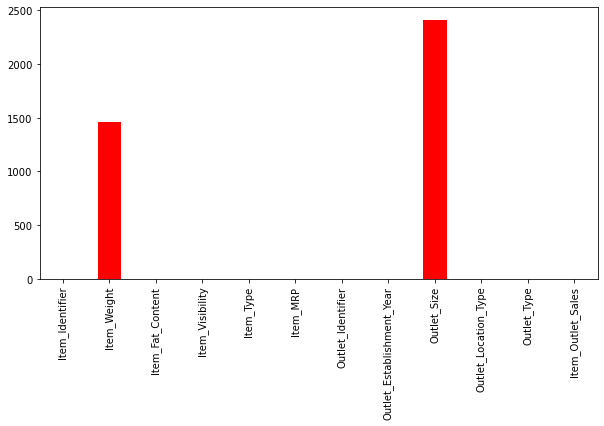

In [311]:
plt.figure(figsize=(10,5))
data.isna().sum().plot(kind="bar", color ="r")

In [312]:
data.Item_Weight.mean()

12.857645184136183

In [313]:

data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace=True)


In [314]:
data["Outlet_Size"].fillna(data["Outlet_Size"].mode(),inplace=True)

In [315]:
sum(data.isna().sum())

TypeError: 'DataFrame' object is not callable

In [316]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [317]:
data1 = data.copy()

In [318]:
from sklearn.impute import SimpleImputer


In [319]:
imputer= SimpleImputer(strategy= "most_frequent")
imputer.fit_transform(data1)

array([['FDA15', 9.3, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        3735.138],
       ['DRC01', 5.92, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        443.4228],
       ['FDN15', 17.5, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        2097.27],
       ...,
       ['NCJ29', 10.6, 'Low Fat', ..., 'Tier 2', 'Supermarket Type1',
        1193.1136],
       ['FDN46', 7.21, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        1845.5976],
       ['DRG01', 14.8, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        765.67]], dtype=object)

In [320]:
imputer.statistics_

array(['FDG33', 12.857645184136183, 'Low Fat', 0.0,
       'Fruits and Vegetables', 172.0422, 'OUT027', 1985, 'Medium',
       'Tier 3', 'Supermarket Type1', 958.752], dtype=object)

In [321]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [322]:
Item_Outlet_Sales = data['Item_Outlet_Sales']

In [323]:
Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [324]:
dat=data.drop(columns="Item_Outlet_Sales", axis=1)

In [325]:
dat

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [326]:
x= imputer.fit_transform(dat.astype(str))

In [327]:
dat = pd.DataFrame(x, columns=dat.columns)

In [328]:
data = pd.concat([dat, Item_Outlet_Sales], axis=1)

In [329]:
data["Outlet_Size"].unique()

array(['Medium', 'nan', 'High', 'Small'], dtype=object)

In [330]:
#mode_outlet = data.pivot_table(values="Outlet_Size", columns= "Outlet_Type", aggfunc=(lambda x: x.mode()[0]))

In [331]:
#mode_outlet

In [332]:
#data.info()

In [333]:

#mis_value = data["Outlet_Size"].isna()


In [334]:
#mis_value

In [335]:
#data.loc[mis_value, "Outlet_Size"] = data.loc[mis_value, "Outlet_Size"].apply(lambda x: mode_outlet )

In [336]:
sum(data.isna().sum())

TypeError: 'DataFrame' object is not callable

# Data Visualization and Analyis

In [337]:
data["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          nan
4         High
         ...  
8518      High
8519       nan
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


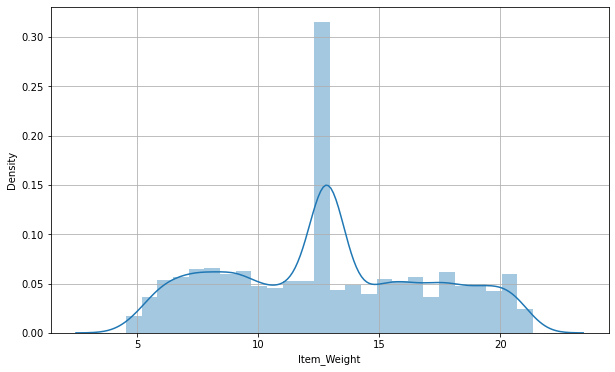

In [338]:
# Item_weight distribution
plt.figure(figsize=(10,6))
sns.distplot(data.Item_Weight)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


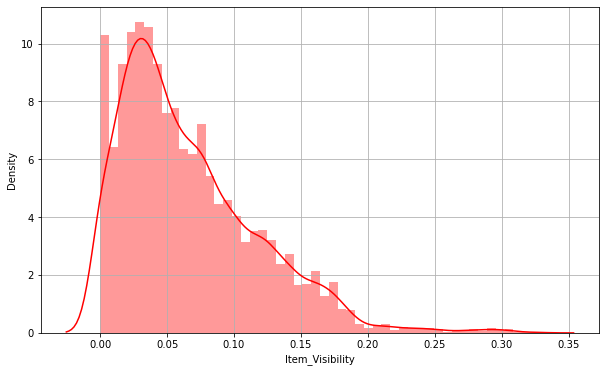

In [339]:
# Item_Visibility distribution
plt.figure(figsize=(10,6))
sns.distplot(data.Item_Visibility, color="r")
plt.grid(True)
plt.show()

In [340]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


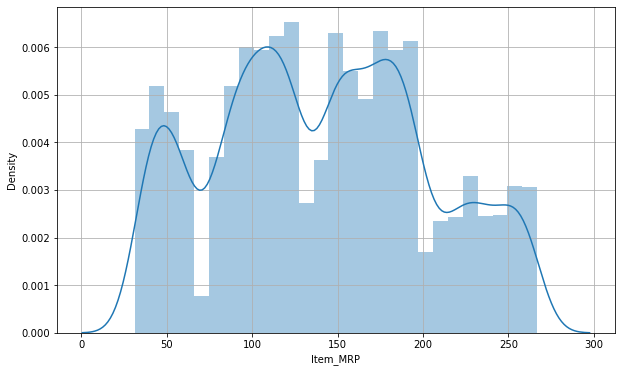

In [341]:
# Item_MRPt distribution
plt.figure(figsize=(10,6))
sns.distplot(data.Item_MRP)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


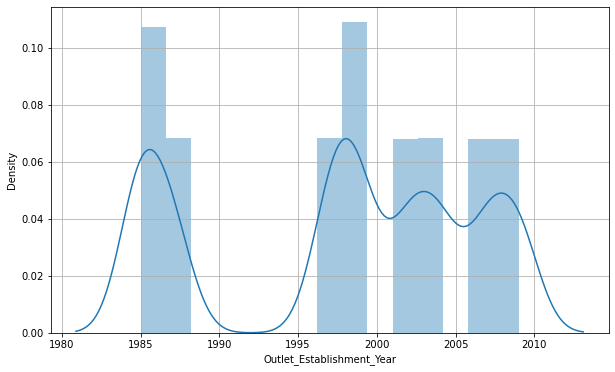

In [342]:
# Item_Outlet_Establishment_Year distribution
plt.figure(figsize=(10,6))
sns.distplot(data.Outlet_Establishment_Year)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


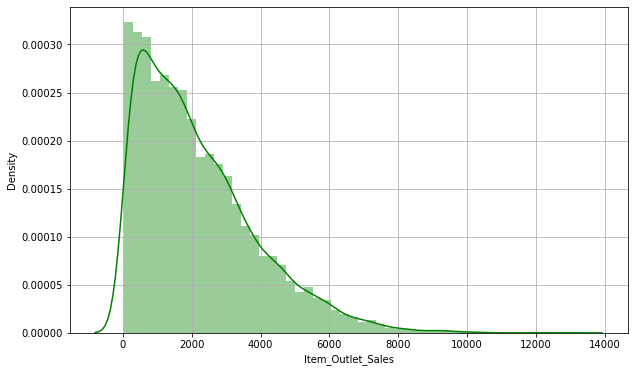

In [343]:
# Item_Outlet_Establishment_Year distribution
plt.figure(figsize=(10,6))
sns.distplot(data.Item_Outlet_Sales, color="g")
plt.grid(True)
plt.show()

In [344]:
from scipy import stats
from scipy.stats import norm

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


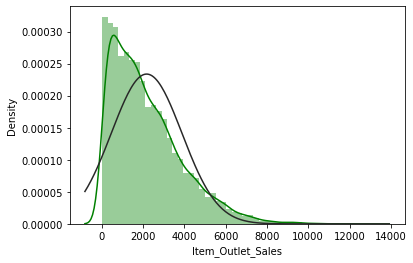

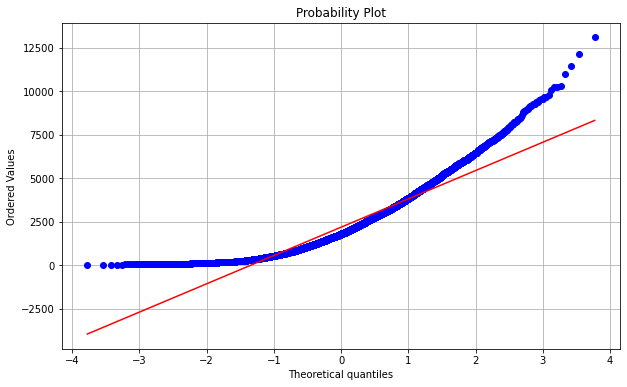

In [345]:
# Item_Outlet_Oulet distribution

sns.distplot(data.Item_Outlet_Sales, color="g", fit= norm)
plt.figure(figsize=(10,6))
stats.probplot(data.Item_Outlet_Sales, plot=plt)
plt.grid(True)
plt.show()

In [346]:
np.log(data["Item_Outlet_Sales"])

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


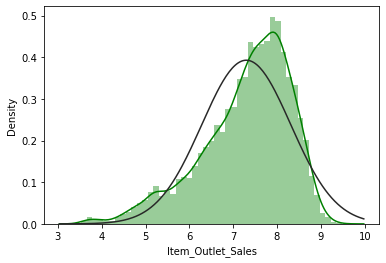

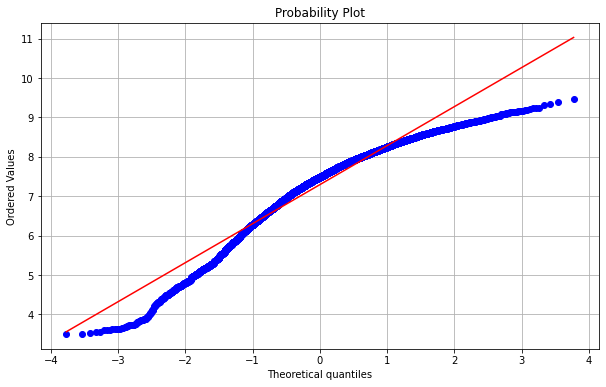

In [347]:
# Item_Outlet_Oulet distribution
# using Log transform since the data is not normaly distributed

sns.distplot(np.log1p(data.Item_Outlet_Sales), color="g", fit= norm)
plt.figure(figsize=(10,6))
stats.probplot(np.log(data["Item_Outlet_Sales"]), plot=plt)
plt.grid(True)
plt.show()

## Categorical data

- Item_Identifier
- Item_Fat_Content
- Item_Visibility
- Item_Type
-Outlet_Identifier
- Outlet_Size               
-Outlet_Location_Type   
-Outlet_Type 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

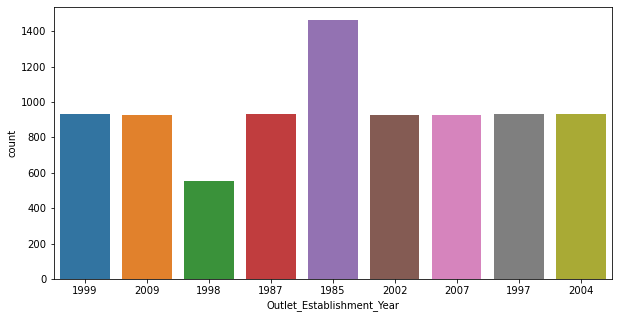

In [348]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Establishment_Year", data=data)

In [349]:
data["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
2004     930
1999     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:>

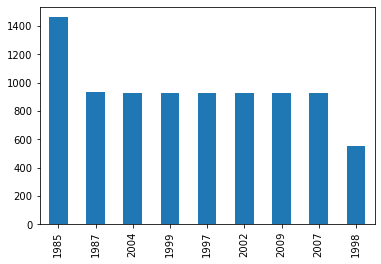

In [350]:
data["Outlet_Establishment_Year"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

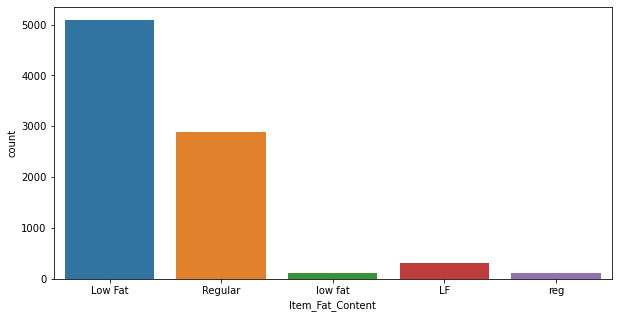

In [351]:
plt.figure(figsize=(10,5))
sns.countplot(x= "Item_Fat_Content", data=data)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

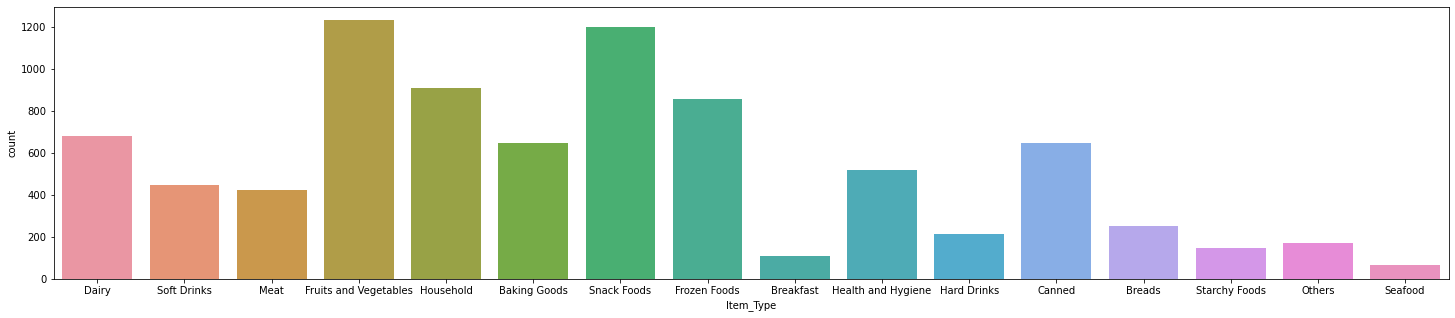

In [352]:
plt.figure(figsize=(25,5))
sns.countplot(x= "Item_Type", data=data)

In [353]:
data["Outlet_Size"].value_counts()

Medium    2793
nan       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

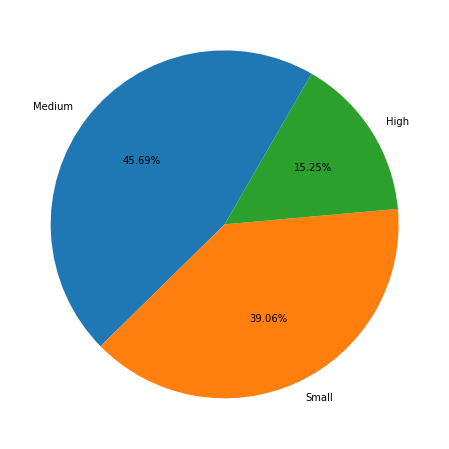

In [354]:

label =["Medium","Small", "High "]
plt.figure(figsize=(10,8))
sizes = [2793, 2388, 932]
plt.pie(sizes,labels=label, startangle=60, autopct='%1.2f%%')
plt.show()

In [355]:
data["Item_Fat_Content"].value_counts()
#tow Fat Content Low and Regular, so i have to map it to to two

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [356]:
data.replace({"Item_Fat_Content" : {"low fat": "Low Fat", "LP":"Low Fat","reg":"Regular"}}, inplace=True)

In [357]:
data["Item_Fat_Content"].value_counts()

Low Fat    5201
Regular    3006
LF          316
Name: Item_Fat_Content, dtype: int64

In [358]:
data["Outlet_Size"].value_counts()

Medium    2793
nan       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [359]:
df = data.copy()

In [360]:
df["Outlet_Size"].unique()

array(['Medium', 'nan', 'High', 'Small'], dtype=object)

In [361]:
encoder = LabelEncoder()

- Item_Identifier
- Item_Fat_Content
- Item_Visibility
- Item_Type
-Outlet_Identifier
- Outlet_Size               
-Outlet_Location_Type
-Outlet_Type


In [128]:
df["Item_Identifier"] = encoder.fit_transform(df["Item_Identifier"])
df["Item_Fat_Content"] = encoder.fit_transform(df["Item_Fat_Content"])
df["Item_Visibility"] = encoder.fit_transform(df["Item_Visibility"])
df["Item_Type"] = encoder.fit_transform(df["Item_Type"])
df["Outlet_Size"] = encoder.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"] = encoder.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"] = encoder.fit_transform(df["Outlet_Type"])
df["Outlet_Identifier"] = encoder.fit_transform(df["Outlet_Identifier"])

In [129]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.3,1,664,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,880,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.5,1,715,10,141.618,9,1999,1,0,1,2097.2700
3,1121,19.2,2,0,6,182.095,0,1998,3,2,0,732.3800
4,1297,8.93,1,0,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,3912,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.38,2,3278,0,108.15700000000001,7,2002,3,1,1,549.2850
8520,1357,10.6,1,2302,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.21,2,7175,13,103.1332,3,2009,1,2,2,1845.5976


## Seperating Input and Target

In [130]:
inputs = df.drop(columns="Item_Outlet_Sales", axis=1)
target = df["Item_Outlet_Sales"]

In [131]:

inputs

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.3,1,664,4,249.8092,9,1999,1,0,1
1,8,5.92,2,880,14,48.2692,3,2009,1,2,2
2,662,17.5,1,715,10,141.618,9,1999,1,0,1
3,1121,19.2,2,0,6,182.095,0,1998,3,2,0
4,1297,8.93,1,0,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,3912,13,214.5218,1,1987,0,2,1
8519,897,8.38,2,3278,0,108.15700000000001,7,2002,3,1,1
8520,1357,10.6,1,2302,8,85.1224,6,2004,2,1,1
8521,681,7.21,2,7175,13,103.1332,3,2009,1,2,2


In [132]:
target

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [133]:
from sklearn.preprocessing import StandardScaler



In [134]:
scaler =StandardScaler()
scaller = scaler.fit_transform(inputs)

In [201]:
x_train,x_test, y_train, y_test= train_test_split(scaller,target, test_size= 0.2, random_state=42)

In [202]:
x_train.shape

(6818, 11)

### linear Regression

In [203]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [204]:
y_hat = lin_reg.predict(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Linear Regresion Residual Distribution')

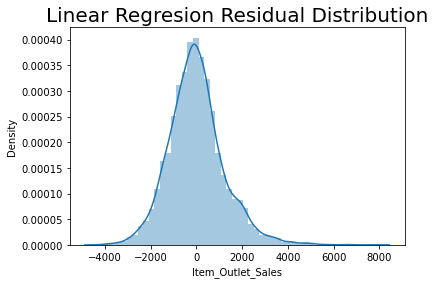

In [205]:
sns.distplot(y_train - y_hat)

plt.title("Linear Regresion Residual Distribution", size=20)

Text(0, 0.5, 'Predicted (y_hat)')

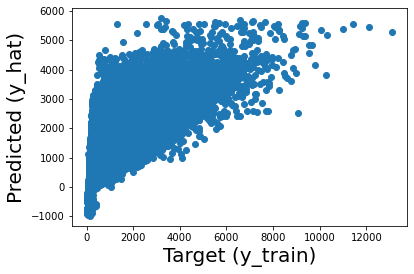

In [206]:
plt.scatter(y_train, y_hat)

plt.xlabel("Target (y_train)", size=20)

plt.ylabel("Predicted (y_hat)", size=20)


In [207]:
y_hat

array([2911.31690725, 2573.12993886, 1808.28129927, ..., 3697.97658142,
       1407.52083804, 1568.44379627])

In [208]:
lin_r2=lin_reg.score(x_train, y_train)

In [209]:
lin_r2

0.4964510706933474

In [210]:
from sklearn.model_selection import cross_val_score

In [211]:
score1 = cross_val_score(lin_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [212]:
lin_cvs =np.sqrt(-score1)

In [213]:
lin_cvs

array([1265.44303621, 1137.44253361, 1195.65962145, 1240.10159839,
       1200.16053734, 1270.84537732, 1205.51331626, 1229.92341079,
       1187.24522091, 1288.02840126])

In [214]:
np.mean(lin_cvs), np.std(lin_cvs)

(1222.0363053534313, 43.3864049899126)

In [215]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_cvs)


Scores: [1265.44303621 1137.44253361 1195.65962145 1240.10159839 1200.16053734
 1270.84537732 1205.51331626 1229.92341079 1187.24522091 1288.02840126]
Mean: 1222.0363053534313
Standard deviation: 43.3864049899126


In [216]:
from sklearn.metrics import mean_squared_error


lin_predict = lin_reg.predict(x_train)
lin_mse = mean_squared_error(x_train, y_train)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

### Decision Tree Regression

In [217]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [218]:
tree_reg.score(x_train, y_train)

1.0

In [219]:
y_hat2 = tree_reg.predict(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Tree Regresion Residual Distribution')

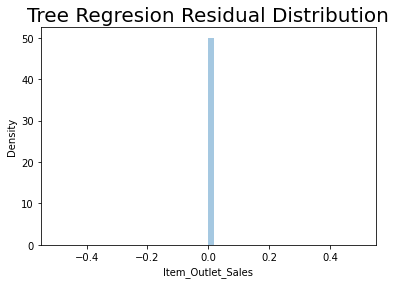

In [220]:
sns.distplot(y_train - y_hat2)
plt.title("Tree Regresion Residual Distribution", size=20)

Text(0, 0.5, 'Predicted (y_hat)')

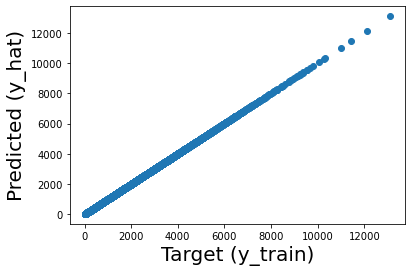

In [221]:
plt.scatter(y_train, y_hat2)

plt.xlabel("Target (y_train)", size=20)

plt.ylabel("Predicted (y_hat)", size=20)


In [222]:
score2 = cross_val_score(tree_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
tree_cvs =np.sqrt(-score2)

In [223]:
np.mean(tree_cvs)

1538.0664069160855

### Ramdom Forest Regressor

In [224]:
from sklearn.ensemble import RandomForestRegressor
forest_reg= RandomForestRegressor()
forest_reg.fit(x_train,y_train)

RandomForestRegressor()

In [225]:
y_hat3 = forest_reg.predict(x_train)

In [226]:
forest_reg.score(x_train,y_train)

0.9376605730217696

Text(0, 0.5, 'Predicted (y_hat)')

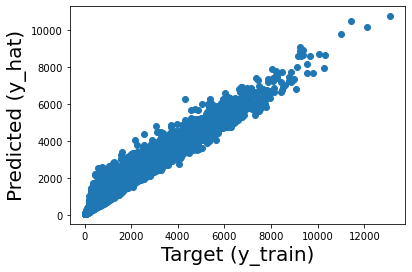

In [227]:
plt.scatter(y_train, y_hat3)

plt.xlabel("Target (y_train)", size=20)

plt.ylabel("Predicted (y_hat)", size=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Forest Regresion Residual Distribution')

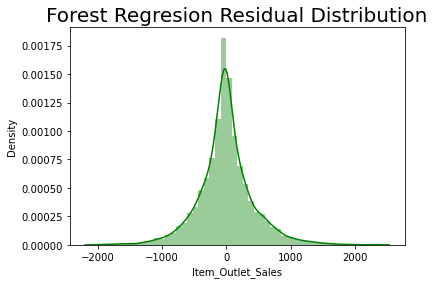

In [228]:
sns.distplot(y_train - y_hat3, color="g")
plt.title("Forest Regresion Residual Distribution", fontsize=20)

In [229]:
score3 = cross_val_score(forest_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
forest_cvs =np.sqrt(-score3)

In [230]:
forest_cvs

array([1178.77892885, 1078.82502249, 1099.32833352, 1165.38706477,
       1123.93107597, 1205.33957219, 1131.01019296, 1139.17175539,
       1149.05480886, 1221.37436937])

In [231]:
np.mean(forest_cvs)

1149.2201124378

### SGD Regressior

In [232]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)


SGDRegressor()

In [233]:
sgd_reg.score(x_train,y_train)

0.4960353101359607

In [234]:
y_hat4 = sgd_reg.predict(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SGDRegressor Risidual Distribution')

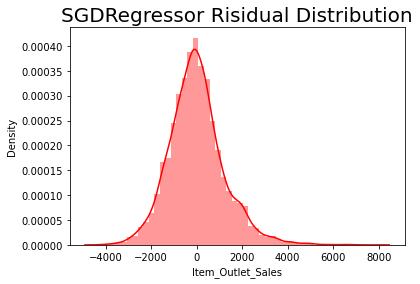

In [235]:
sns.distplot(y_train - y_hat4, color="r")
plt.title("SGDRegressor Risidual Distribution", fontsize=20)

In [236]:
score4 = cross_val_score(sgd_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
sgd_cvs =np.sqrt(-score4)

In [237]:
sgd_cvs

array([1270.47763156, 1138.43984459, 1196.30767363, 1235.40511054,
       1200.42204682, 1271.37897004, 1206.47077862, 1233.66973289,
       1188.59869034, 1289.16203053])

In [238]:
np.mean(sgd_cvs)

1223.0332509533894

# Summary and Decision Making

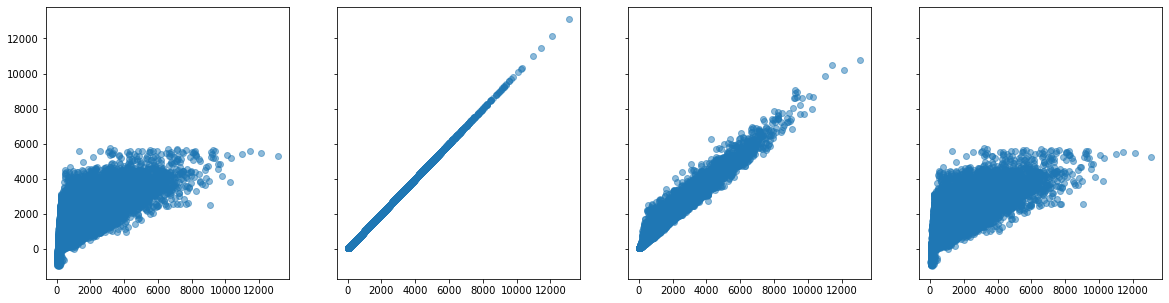

In [273]:
f, (x1, x2, x3, x4) = plt.subplots(1, 4, sharey= True, figsize=(20,5))
x1.scatter(y_train, y_hat, alpha=0.5)


x2.scatter(y_train, y_hat2, alpha=0.5)

x3.scatter(y_train, y_hat3, alpha=0.5)


x4.scatter(y_train, y_hat4, alpha=0.5)



In [271]:
summ = pd.DataFrame([
    ["Linear Regresion", np.mean(lin_cvs), lin_reg.score(x_train, y_train)],
    ["Tree_Regression", np.mean(tree_cvs), tree_reg.score(x_train, y_train)],
    ["Random Forest Regressor", np.mean(forest_cvs), forest_reg.score(x_train, y_train)],
    ["SDG Regressor", np.mean(sgd_cvs), sgd_reg.score(x_train, y_train)]],columns=[["Training Mode", "Cross_val_scor Mean", "R_Square Score"]])

In [272]:
summ

,Training Mode,Cross_val_scor Mean,R_Square Score
0,Linear Regresion,1222.036305,0.496451
1,Tree_Regression,1538.066407,1.000000
2,Random Forest Regressor,1149.220112,0.937661
3,SDG Regressor,1223.033251,0.496035


Random forest Regression happen to be the best model suitable for this data set, has it r_square values range to 94% accuracy test

## Testing Model

In [276]:
y_hat_test = forest_reg.predict(x_test)

In [277]:
sns.distplot(x_test - y_hat_test)

ValueError: operands could not be broadcast together with shapes (1705,11) (1705,) 

Text(0, 0.5, 'Predicted (y_test)')

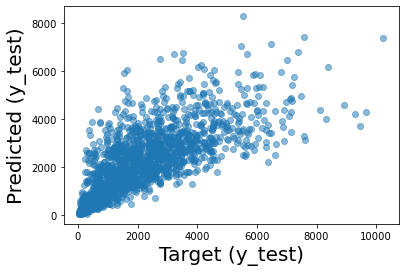

In [278]:
plt.scatter(y_test, y_hat_test, alpha=0.5)

plt.xlabel("Target (y_test)", size=20)

plt.ylabel("Predicted (y_test)", size=20)

Text(0, 0.5, 'Predicted (y_hat)')

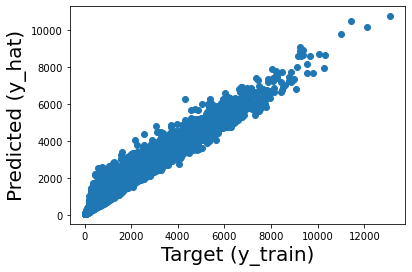

In [280]:
plt.scatter(y_train, y_hat3)

plt.xlabel("Target (y_train)", size=20)

plt.ylabel("Predicted (y_hat)", size=20)

In [282]:
df_pf = pd.DataFrame((y_hat_test), columns=["Prediction"])
df_pf.head()

,Prediction
0,749.817302
1,790.737370
2,844.214426
3,4709.389824
4,1993.811338


In [285]:
y_test = y_test.reset_index(drop=True)
df_pf["Target"] = (y_test)

In [286]:
df_pf

,Prediction,Target
0,749.817302,1743.0644
1,790.737370,356.8688
2,844.214426,377.5086
3,4709.389824,5778.4782
4,1993.811338,2356.9320
...,...,...
1700,1879.273764,3004.0896
1701,2205.961850,890.8404
1702,780.144492,629.1810
1703,622.922480,253.0040


In [288]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Prediction"]
df_pf["Different%"] =np.abs( df_pf["Residual"]/df_pf["Target"]*100)

In [289]:
df_pf

,Prediction,Target,Residual,Different%
0,749.817302,1743.0644,993.247098,56.982811
1,790.737370,356.8688,-433.868570,121.576493
2,844.214426,377.5086,-466.705826,123.627866
3,4709.389824,5778.4782,1069.088376,18.501210
4,1993.811338,2356.9320,363.120662,15.406497
...,...,...,...,...
1700,1879.273764,3004.0896,1124.815836,37.442819
1701,2205.961850,890.8404,-1315.121450,147.627055
1702,780.144492,629.1810,-150.963492,23.993651
1703,622.922480,253.0040,-369.918480,146.210526


In [290]:
df_pf.describe()

,Prediction,Target,Residual,Different%
count,1705.000000,1705.000000,1705.000000,1705.000000
mean,2152.538792,2097.008366,-55.530426,58.175208
std,1388.576467,1649.110402,1099.779100,89.719926
min,57.545094,33.290000,-4403.115166,0.039440
25%,971.901550,772.328000,-568.140456,15.531828
50%,2008.738574,1733.743200,-68.750508,31.368557
75%,3013.776990,2988.110400,436.771458,58.880978
max,8301.547274,10236.675000,5760.628102,944.766497


In [370]:
pd.options.display.max_rows= 999
df_pf.round(4).sort_values(by=["Different%"]

SyntaxError: unexpected EOF while parsing (<ipython-input-370-6fb148529e33>, line 2)

In [372]:
pd.options.display.max_rows = None

df_pf.round(4).sort_values(by=["Different%"])

,Prediction,Target,Residual,Different%
145,2615.5620,2616.5940,1.0320,0.0394
1315,280.6946,280.9676,0.2730,0.0972
615,3708.9654,3705.1770,-3.7884,0.1022
1033,578.5003,579.2460,0.7457,0.1287
1450,746.6814,745.6960,-0.9854,0.1321
797,3462.4330,3455.5020,-6.9310,0.2006
1365,5868.4677,5880.3456,11.8779,0.2020
193,811.6768,809.6128,-2.0640,0.2549
1154,2546.5984,2553.3430,6.7446,0.2641
25,1293.9890,1298.3100,4.3210,0.3328


In [296]:
#Export DataFrame to csv 
df_pf.to_csv(r'C:\Users\DVICEPP/Documents/BigMartPrediction', index = False)

In [297]:
df_pf["Prediction"]

0        749.817302
1        790.737370
2        844.214426
3       4709.389824
4       1993.811338
           ...     
1700    1879.273764
1701    2205.961850
1702     780.144492
1703     622.922480
1704    1585.249826
Name: Prediction, Length: 1705, dtype: float64

In [362]:
d = pd.concat([data, 
                  df_pf["Prediction"]], axis=1)

In [364]:
d

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Prediction
0,FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,749.817302
1,DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,790.737370
2,FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,844.214426
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,nan,Tier 3,Grocery Store,732.3800,4709.389824
4,NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1993.811338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783389000000004,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,NaN
8519,FDS36,8.38,Regular,0.046982429000000006,Baking Goods,108.15700000000001,OUT045,2002,nan,Tier 2,Supermarket Type1,549.2850,NaN
8520,NCJ29,10.6,Low Fat,0.035186271,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NaN
8521,FDN46,7.21,Regular,0.145220646,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,NaN


In [365]:
#Export DataFrame to csv 
d.to_csv(r'C:\Users\DVICEPP/Documents/BigMartPrediction2', index = False)